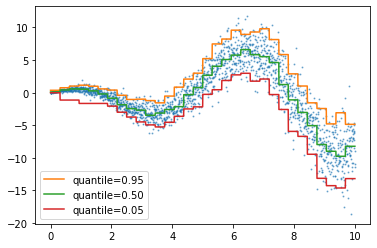

In [1]:
from sklearn.ensemble import HistGradientBoostingRegressor
import numpy as np
import matplotlib.pyplot as plt

# Simple regression function for X * cos(X)
rng = np.random.RandomState(42)
X_1d = np.linspace(0, 10, num=2000)
X = X_1d.reshape(-1, 1)
y = X_1d * np.cos(X_1d) + rng.normal(scale=X_1d / 3)

quantiles = [0.95, 0.5, 0.05]
parameters = dict(loss="quantile", max_bins=32, max_iter=50)
hist_quantiles = {
    f"quantile={quantile:.2f}": HistGradientBoostingRegressor(
        **parameters, quantile=quantile
    ).fit(X, y)
    for quantile in quantiles
}

fig, ax = plt.subplots()
ax.plot(X_1d, y, "o", alpha=0.5, markersize=1)
for quantile, hist in hist_quantiles.items():
    ax.plot(X_1d, hist.predict(X), label=quantile)
_ = ax.legend(loc="lower left")

In [2]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression

X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)
numeric_features = ["age", "fare"]
numeric_transformer = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())
categorical_features = ["embarked", "pclass"]

preprocessor = ColumnTransformer(
    [
        ("num", numeric_transformer, numeric_features),
        (
            "cat",
            OneHotEncoder(handle_unknown="ignore", sparse=False),
            categorical_features,
        ),
    ],
    verbose_feature_names_out=False,
)
log_reg = make_pipeline(preprocessor, SelectKBest(k=7), LogisticRegression())
log_reg.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'fare']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['embarked', 'pclass'])],
                                   verbose_feature_names_out=False)),
                ('selectkbest', SelectKBest(k=7)),
                ('logisticregression', LogisticRegression())])

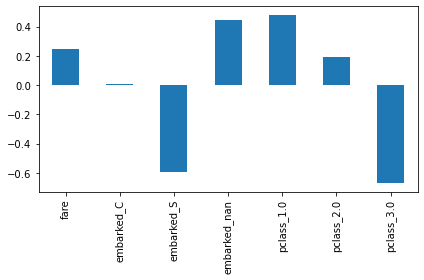

In [3]:
import pandas as pd

log_reg_input_features = log_reg[:-1].get_feature_names_out()
pd.Series(log_reg[-1].coef_.ravel(), index=log_reg_input_features).plot.bar()
plt.tight_layout()

In [4]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

X = np.array(
    [["dog"] * 5 + ["cat"] * 20 + ["rabbit"] * 10 + ["snake"] * 3], dtype=object
).T
enc = OneHotEncoder(min_frequency=6, sparse=False).fit(X)
enc.infrequent_categories_

[array(['dog', 'snake'], dtype=object)]

In [5]:
encoded = enc.transform(np.array([["dog"], ["snake"], ["cat"], ["rabbit"]]))
pd.DataFrame(encoded, columns=enc.get_feature_names_out())

,x0_cat,x0_rabbit,x0_infrequent_sklearn
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0


In [6]:
import numpy as np
from sklearn.decomposition import MiniBatchNMF

rng = np.random.RandomState(0)
n_samples, n_features, n_components = 10, 10, 5
true_W = rng.uniform(size=(n_samples, n_components))
true_H = rng.uniform(size=(n_components, n_features))
X = true_W @ true_H

nmf = MiniBatchNMF(n_components=n_components, random_state=0)

for _ in range(10):
    nmf.partial_fit(X)

W = nmf.transform(X)
H = nmf.components_
X_reconstructed = W @ H

print(
    f"relative reconstruction error: ",
    f"{np.sum((X - X_reconstructed) ** 2) / np.sum(X**2):.5f}",
)

relative reconstruction error:  0.00364


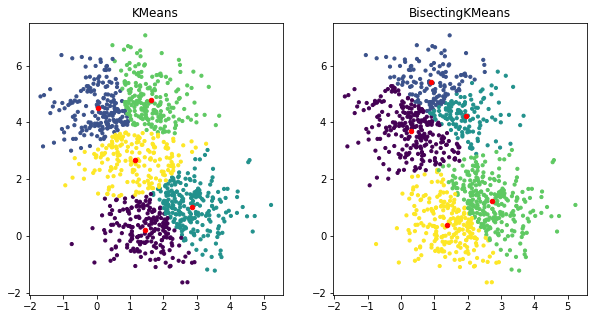

In [7]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, BisectingKMeans
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=1000, centers=2, random_state=0)

km = KMeans(n_clusters=5, random_state=0).fit(X)
bisect_km = BisectingKMeans(n_clusters=5, random_state=0).fit(X)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(X[:, 0], X[:, 1], s=10, c=km.labels_)
ax[0].scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=20, c="r")
ax[0].set_title("KMeans")

ax[1].scatter(X[:, 0], X[:, 1], s=10, c=bisect_km.labels_)
ax[1].scatter(
    bisect_km.cluster_centers_[:, 0], bisect_km.cluster_centers_[:, 1], s=20, c="r"
)
_ = ax[1].set_title("BisectingKMeans")